#**VGG19 implementation in Pytorch & Keras:**

Based on the paper Very Deep Convolutional Networks for Large-Scale Image Recognition


---
No well accuracy for Cifar10



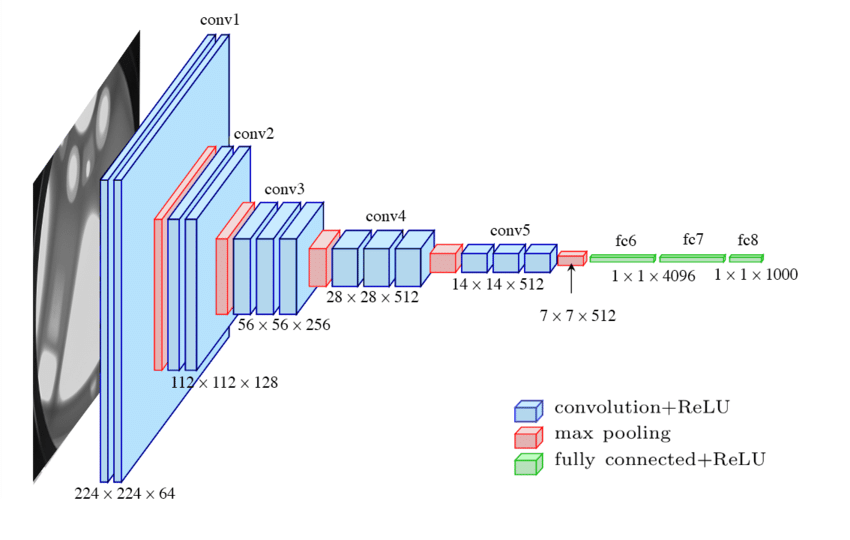

In [1]:
from tensorflow.keras import layers, Model
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class VGG19(Model):
  def __init__(self, num_classes):
    super(VGG19, self).__init__()

    #Block 1
    self.Block1 = tf.keras.Sequential([
        layers.Conv2D(64,(3,3), padding='same', activation='relu' , input_shape = (32,32,3)),
        layers.Conv2D(64,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    #Block 2
    self.Block2 = tf.keras.Sequential([
        layers.Conv2D(128,(3,3), padding='same', activation='relu'),
        layers.Conv2D(128,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block3 = tf.keras.Sequential([
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block4 = tf.keras.Sequential([
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block5 = tf.keras.Sequential([
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.flatten = layers.Flatten()
class VGG19(Model):
  def __init__(self, num_classes):
    super(VGG19, self).__init__()

    #Block 1
    self.Block1 = tf.keras.Sequential([
        layers.Conv2D(64,(3,3), padding='same', activation='relu'),
        layers.Conv2D(64,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    #Block 2
    self.Block2 = tf.keras.Sequential([
        layers.Conv2D(128,(3,3), padding='same', activation='relu'),
        layers.Conv2D(128,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block3 = tf.keras.Sequential([
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.Conv2D(256,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block4 = tf.keras.Sequential([
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.Block5 = tf.keras.Sequential([
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.Conv2D(512,(3,3), padding='same', activation='relu'),
        layers.MaxPool2D((2,2), strides=2)
    ])

    self.flatten = layers.Flatten()
    self.fc1 = layers.Dense(4096, activation='relu')
    self.fc2 = layers.Dense(4096, activation='relu')
    self.fc3 = layers.Dense(num_classes, activation='softmax')

  def call(self, inputs, training=False):
      x = self.Block1(inputs)
      x = self.Block2(x)
      x = self.Block3(x)
      x = self.Block4(x)
      x = self.Block5(x)
      x = self.flatten(x)
      x = self.fc1(x)
      x = self.fc2(x)
      x = self.fc3(x)
      return x




In [3]:
(train_image , train_label) , (test_image , test_label) = tf.keras.datasets.cifar10.load_data()
train_image = train_image / 255.0
test_image = test_image / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

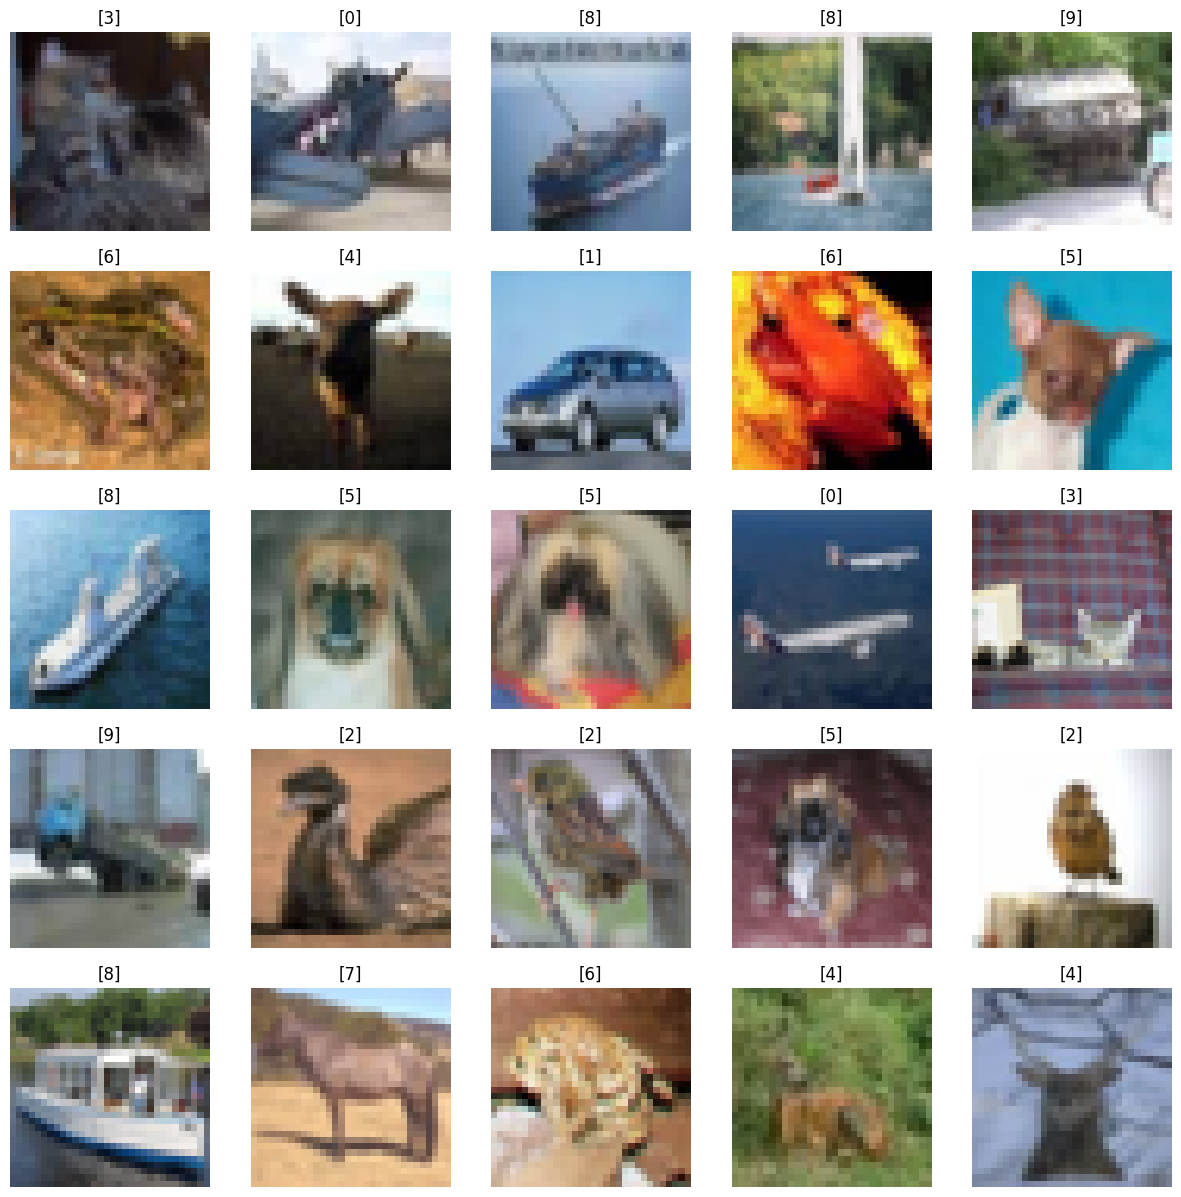

In [5]:
fig , ax = plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(5):
        index = np.random.randint(40000)
        ax[i][j].set_axis_off()
        ax[i][j].imshow(train_image[index])
        ax[i][j].set_title(train_label[index])
plt.show()

# PyTorch

In [8]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

In [13]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [10]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
indices = list(range(1000))
train_set = Subset(train_set, indices)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_set = Subset(test_set, indices)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:04<00:00, 36.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [14]:
class VGG19(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG19, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096), nn.ReLU(inplace=True),
            nn.Linear(4096, 4096), nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [15]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # برای CIFAR-10 ابعاد 32x32 است
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG19(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 2.3030
Epoch [2/10], Loss: 2.3027
Epoch [3/10], Loss: 2.3027
Epoch [4/10], Loss: 2.3027
Epoch [5/10], Loss: 2.3027
Epoch [6/10], Loss: 2.3027
Epoch [7/10], Loss: 2.3027
Epoch [8/10], Loss: 2.3027
Epoch [9/10], Loss: 2.3027
Epoch [10/10], Loss: 2.3027
Accuracy: 10.00%
